In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Batch Gradient Descent (BGD)

Average residual loss
Residual Error (Initial) : 189.47
Residual Error (Converged): 17.99


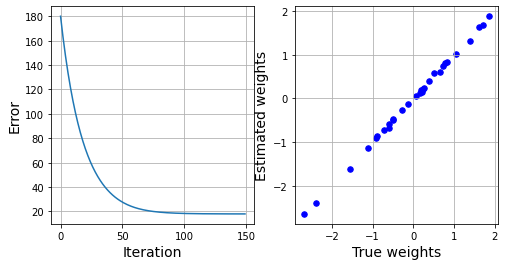

In [4]:
# Set up synthetic data
N, p = 500, 30
X = np.random.randn(N, p)

wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

# Initial guess and error
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)

MaxIter = 150
lRate = 0.0001

Eplot = np.zeros((MaxIter, 1))

wIter= w0
for iter in range(MaxIter):
    wIter = wIter - lRate * X.T @ (X @ wIter - yTarget)  
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(Eplot)
ax[0].set_xlabel("Iteration", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)
ax[0].grid(True)

ax[1].scatter(wTrue, wIter, c="b", s=30)
ax[1].grid(True)
ax[1].set_xlabel("True weights", fontsize=14)
ax[1].set_ylabel("Estimated weights", fontsize=14)

print("Average residual loss")
print("Residual Error (Initial) : %3.2f" %(E0))
print("Residual Error (Converged): %3.2f"
%(np.linalg.norm(X @ wIter - yTarget)))
#plt.savefig("GDLearningCurve.png")

# Stochastic Gradient Descent (SGD)

Initial loss: 122.61224773149075
Final loss 48.519945938292445
Minimum loss: 25.625946680793675 at epoch 1873


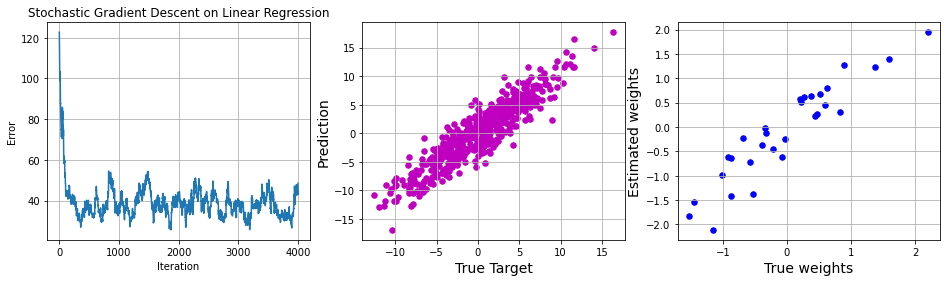

In [5]:
# Number of data and dimensions
N, p = 500, 30

# Input data (covariates)
X = np.random.randn(N, p)

# True parameters
wTrue = np.random.randn(p, 1)

# Set up targets (response)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0) 
print('Initial loss:',E0)

MaxIter = 4000
lRate = 0.05  
Eplot = np.zeros((MaxIter, 1))

wIter= w0
min_loss = 1000
min_loss_epoch = 0

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = X[j,:]
    xj = np.array([X[j,:]]).T  # j-th sample 
    yj = yTarget[j,:]   # j-th target 
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj   
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)  
    
    if np.linalg.norm(yTarget - X @ wIter) < min_loss:
        min_loss = np.linalg.norm(yTarget - X @ wIter)
        min_loss_epoch = iter

print('Final loss',np.linalg.norm(yTarget - X @ wIter))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax[0].plot(Eplot)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Error")
ax[0].grid(True)
ax[0].set_title("Stochastic Gradient Descent on Linear Regression")

ax[1].scatter(yTarget, X @ wIter, c="m", s=30)
ax[1].grid(True)
ax[1].set_xlabel("True Target", fontsize=14)
ax[1].set_ylabel("Prediction", fontsize=14)

ax[2].scatter(wTrue, wIter, c="b", s=30)
ax[2].grid(True)
ax[2].set_xlabel("True weights", fontsize=14)
ax[2].set_ylabel("Estimated weights", fontsize=14)

print('Minimum loss:', min_loss, 'at epoch', min_loss_epoch)

# Recursive Least Squares

18.335201914963736


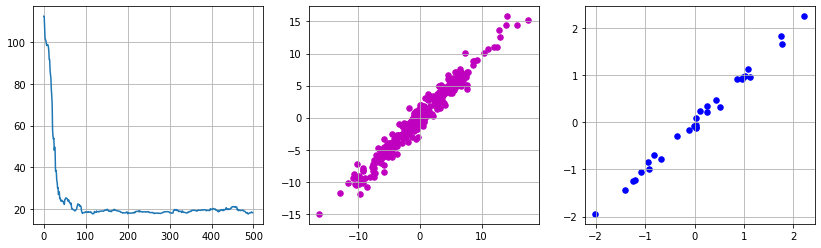

In [6]:
N, p = 800, 30

X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
Y = X@wTrue + 0.9*np.random.randn(N,1)

q = 500
Xtrain = X[:q]
Ytrain = Y[:q]
Xtest = X[q:]
Ytest = Y[q:]

xn = Xtrain[0]
xn = np.expand_dims(xn,-1)
xnT = xn.T
Pn = np.identity(p)

lamba = 0.98
wRLS= np.random.randn(p,1)

errors = []
single_errors = []
for i in range(len(Xtrain)-1):
    xn = Xtrain[i+1]
    xn = np.expand_dims(xn,-1)
    xnT = xn.T
    yn = Ytrain[i+1]
    
    num = (1/(lamba**2))*(Pn@xn@xnT@Pn)
    denum = 1 + xnT@((1/lamba)*Pn)@xn
    Pn = (1/lamba)*Pn - num/denum
    
    kn = Pn@xn
    
    wRLS = wRLS - kn@(xnT@wRLS - yn)
    
    loss = np.linalg.norm(Xtest@wRLS - Ytest)
    single_loss = (xnT@wRLS - yn)#**2
    
    errors.append(loss)
    single_errors.append(single_loss[0][0])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

ax[0].plot(errors)
ax[0].grid(True)

ax[1].scatter(Ytest, Xtest @ wRLS, c="m", s=30)
ax[1].grid(True)

ax[2].scatter(wTrue, wRLS, c="b", s=30)
ax[2].grid(True)

print(errors[-1])